# Aprendizaje Automático

* Ya revisamos la técnica más sencilla de clasificación, Naïve Bayes.
* Hay otra técnica básica muy usada antes de ver los temas avanzados: Regresión Lineal.

## Regresión Lineal
El método de regresión lineal presenta algunas ventajas:  
* Puede hacerse con pocos datos $\sim 300$.  
* Es muy sencillo de construir e implementar.  
* El efecto de las variables puede interpretarse de forma intuitiva.
* No requiere gran poder de cómputo

También supone algunas desventajas:
* Tiene un desempeño limitado
* Asume que no existe correlación entre las variables. (También el método de Bayes)

Un modelo lineal asume que, si una variable aleatoria $y$ está correlacionada con un conjunto de $N$ variables $\vec{x}$, la esperanza de $y$, dado que se tienen los valor $x^k$, está dada por:
$$
E(y|x^k) = \sum_{k=1}^{N} \beta_{k} x ^{k} + \beta_0.
$$

Fueron ampliamente desarrolladas y usadas antes de la estadística computacional, y funcionan en situaciones donde se tienen pocos datos, donde el cociente de señal a ruido es $\sim 1$, o se tienen datos con poca separación. Incluso en algunas situaciones, pueden desempeñarse mejor que otros métodos más sofisticados.

Usando el método de mínimos cuadrados, es fácil encontrar una expresión para los $\beta_k$ en términos de los datos $x^{k}_{i}$ y $y_{i}$ de entrenamiento:

$$
\left(\begin{array}. 
\hat{\beta}_0 \\
\hat{\beta}_1 \\
\vdots \\
\hat{\beta}_k \\
\vdots \\
\hat{\beta}_N
\end{array}\right) 
= 
\left(\begin{array}.
n & n\bar{x}^{1}  & \ldots & n\bar{x}^{k} & \ldots & n\bar{x}^{N}\\
n\bar{x}^{1} & \sum (x^{1}_i)^2 & \ldots & \sum x^{k}_ix^{1}_i& \ldots & \sum x^{N}_ix^{1}_i\\
\vdots & \vdots & \ddots & \vdots & \ldots & \vdots\\
n\bar{x}^{1} & \sum x^{1}_ix^{k}_i & \ldots & \sum (x^{k}_i)^2& \ldots & \sum x^{N}_ix^{k}_i\\
\vdots & \vdots & \ldots & \vdots & \ddots & \vdots\\
n\bar{x}^{1} & \sum x^{1}_ix^{N}_i & \ldots & \sum x^{k}_ix^{N}_i& \ldots & \sum (x^{N}_i)^2
\end{array}\right)^{\Large -1}
\left(\begin{array}. 
n\bar{y} \\ 
\sum x^{1}_iy_i \\
\vdots \\
\sum x^{k}_iy_i \\
\vdots \\
\sum x^{N}_iy_i
\end{array}\right),
$$ 
donde todas las sumas van de $1\ldots n$, donde $n$ es el número de datos.

**Es importante notar, que las variables usadas en una regresión lineal deben tener algúna interpretación cuantitativa. Es decir, si las variables con categorías, deben ser binarias.**  
Usemos las siguientes variables para crear nuestro modelo lineal:
* `amount`,
* `savings_acc_numeric`, 
* `p_employment_time_numeric`,
* `installment_rate`, 
* `p_residence_time`,
* `age`,
* `number_of_credits`,
* `dependants`,
* `has_phone_numeric`,
* `foreign_worker_numeric`

In [1]:
from linnear_model import LinnearModel
from pandas import read_csv as read_csv
df = read_csv('data/german.data.all-numeric.csv',header=0)
df_trainning = df.sample(frac=0.7, replace=False, random_state=1)
df_testing = df.drop(df_trainning.index)
linnear_score = []
varnames =['amount', 'savings_acc_numeric', 'p_employment_time_numeric', 'installment_rate', 'p_residence_time',
             'age', 'number_of_credits', 'dependants', 'has_phone_numeric', 'foreign_worker_numeric']
lm = LinnearModel(varnames)
lm.train()
for row in df_testing.iterrows():
    row = row[1]
    myvars = {'amount': row['amount'],
            'savings_acc_numeric': row['savings_acc_numeric'],
            'p_employment_time_numeric': row['p_employment_time_numeric'],
            'installment_rate': row['installment_rate'],
            'p_residence_time': row['p_residence_time'],
            'age': row['age'],
            'number_of_credits': row['number_of_credits'],
            'dependants': row['dependants'],
            'has_phone_numeric': row['has_phone_numeric'],
            'foreign_worker_numeric': row['foreign_worker_numeric']}
    myscore = lm.score(myvars)
    linnear_score.append(myscore)
df_testing['linnear_score'] = linnear_score

In [2]:
df_testing.head(10)

,checking_acc_numeric,time_credit_acc,credit_history_numeric,purpose_numeric,amount,savings_acc_numeric,p_employment_time_numeric,installment_rate,marita_status_sex_numeric,other_debtors_numeric,...,age,other_installment_numeric,housing_numeric,number_of_credits,job_numeric,dependants,has_phone_numeric,foreign_worker_numeric,is_good,linnear_score
7,2,36,4,4,6948,1,3,2,1,1,...,35,0,2,1,4,1,1,1,1,0.643094
10,2,12,4,2,1295,1,2,3,2,1,...,25,0,2,1,3,1,0,1,2,0.672193
15,1,24,4,1,1282,2,3,4,2,1,...,32,0,1,1,2,1,0,1,2,0.665924
20,4,9,3,2,2134,1,3,4,1,1,...,48,0,1,3,3,1,1,1,1,0.757510
21,1,6,4,1,2647,3,3,2,1,1,...,44,0,2,1,3,2,0,1,1,0.689109
22,1,10,3,2,2241,1,2,1,1,1,...,48,0,2,2,2,2,0,0,1,0.923323
24,4,10,3,3,2069,0,3,2,3,1,...,26,0,1,2,3,1,0,0,1,0.962427
25,1,6,4,3,1374,1,3,1,1,1,...,36,2,1,1,2,1,1,1,1,0.930998
26,4,6,0,1,426,1,5,4,3,1,...,39,0,1,1,2,1,0,1,1,0.771905
28,2,7,4,1,2415,1,3,3,1,2,...,34,0,1,1,3,1,0,1,1,0.676908


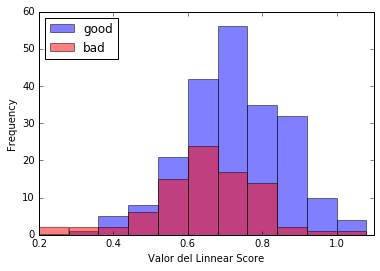

In [16]:
%matplotlib inline
from matplotlib import pyplot as plt
from numpy import arange
linnear_scores_range = arange(0.2,1.1,0.06)
df_good = df_testing[df_testing['is_good']==1] 
df_bad = df_testing[df_testing['is_good']!=1]
htest_good = df_good['linnear_score'].plot.hist(bins=linnear_scores_range,color='b',alpha=0.5,label='good')
htest_bad = df_bad['linnear_score'].plot.hist(bins=linnear_scores_range,color='r',alpha=0.5,label='bad')
plt.legend(loc='upper left')
plt.xlabel('Valor del Linnear Score')

In [17]:
from bootstrap import bootstrapped_utility
from pandas import DataFrame
bs_f = bootstrapped_utility(df_testing=df_testing,varname='linnear_score', bins = linnear_scores_range)
bs_df = DataFrame(bs_f)
bs_df = bs_df.transpose()
for n in range(0,100):
    bs_f = bootstrapped_utility(df_testing=df_testing,varname='linnear_score', bins = linnear_scores_range)
    bs_df_tmp = DataFrame(bs_f)
    bs_df_tmp = bs_df_tmp.transpose()
    bs_df.loc[n]=bs_df_tmp.loc[0]      
bs_results=bs_df.describe()
bs_results

,0,1,2,3,4,5,6,7,8,9,10
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-5000.000000,12640.000000,25150.000000,11860.000000,19270.000000,34330.000000,-4400.000000,-186830.000000,-260030.000000,-432290.000000,-484760.000000
std,95298.573871,96115.725702,94015.835223,94430.137716,91246.016102,87507.812638,72596.017922,56199.150754,37577.785991,27297.202654,15061.570605
min,-200000.000000,-182000.000000,-179000.000000,-200000.000000,-185000.000000,-170000.000000,-206000.000000,-329000.000000,-335000.000000,-494000.000000,-521000.000000
25%,-80000.000000,-65000.000000,-41750.000000,-59000.000000,-47000.000000,-23750.000000,-53000.000000,-227750.000000,-284000.000000,-455000.000000,-497000.000000
50%,10000.000000,20500.000000,31000.000000,14500.000000,25000.000000,25000.000000,1000.000000,-183500.000000,-260000.000000,-431000.000000,-483500.000000
75%,55000.000000,73750.000000,91000.000000,70000.000000,76750.000000,106750.000000,46000.000000,-146000.000000,-238250.000000,-415250.000000,-476000.000000
max,220000.000000,220000.000000,232000.000000,232000.000000,250000.000000,247000.000000,145000.000000,-62000.000000,-170000.000000,-365000.000000,-446000.000000


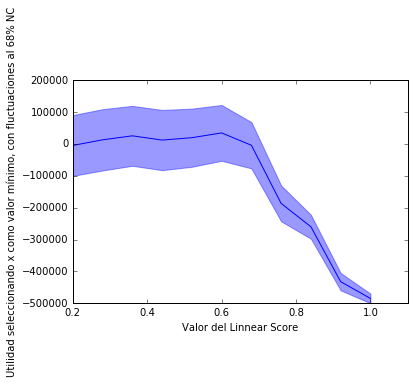

In [18]:
bs_mean = bs_results.loc['mean',]
bs_std = bs_results.loc['std',]
plt.plot(linnear_scores_range[:(len(bs_mean))], bs_mean, 'k', color='blue')
plt.fill_between(linnear_scores_range[:(len(bs_mean))], bs_mean-bs_std, bs_mean+bs_std,
    alpha=0.4, edgecolor='blue', facecolor='blue')
plt.xlabel('Valor del Linnear Score')
plt.ylabel('Utilidad seleccionando x como valor mínimo, con fluctuaciones al 68% NC')